In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

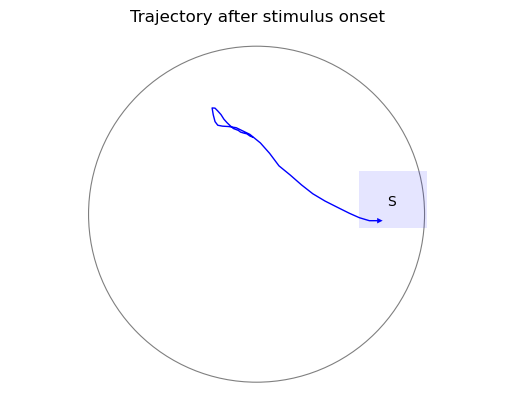

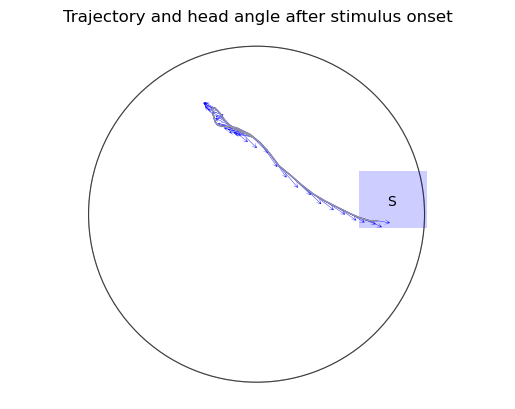

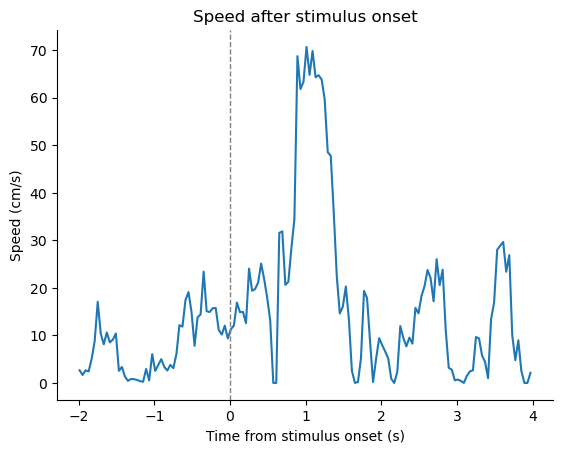

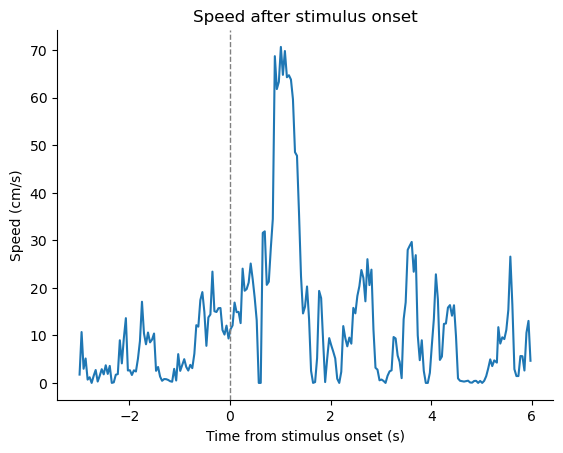

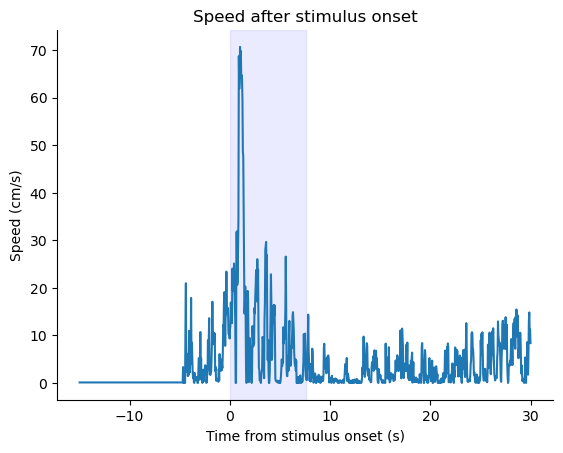

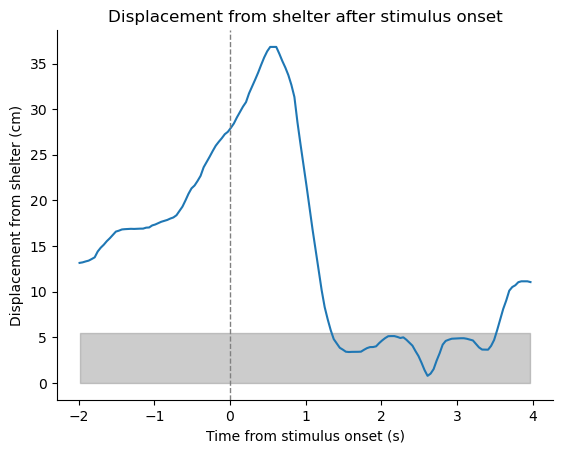

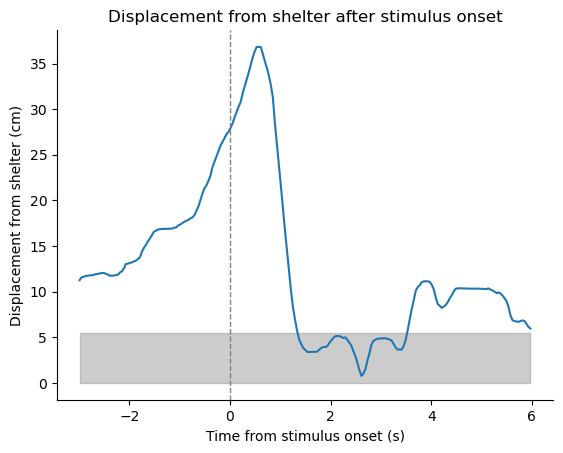

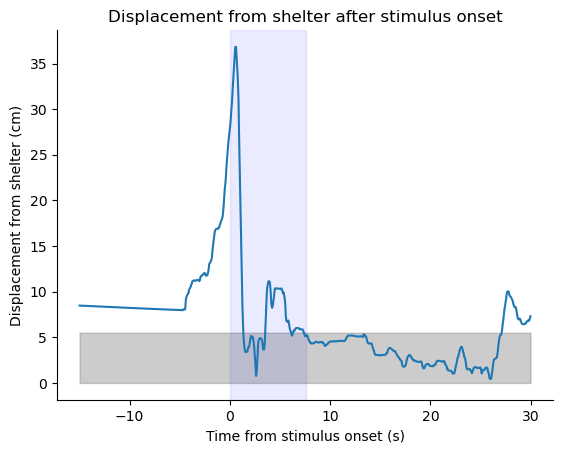

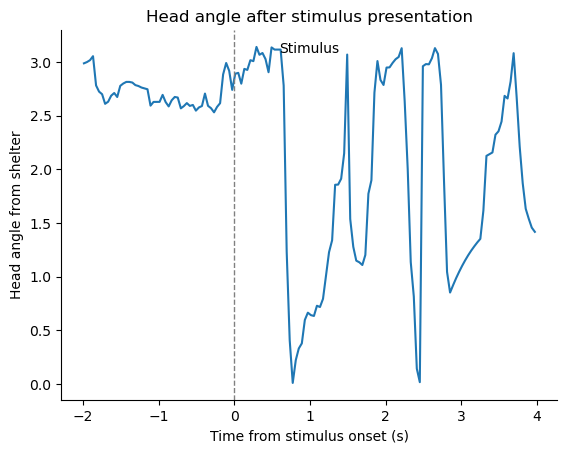

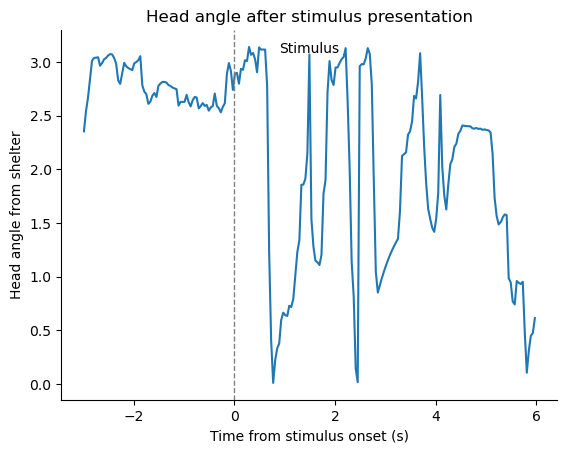

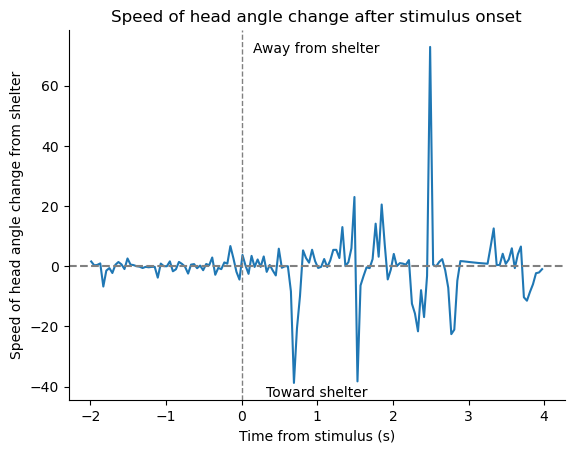

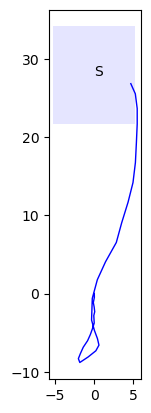

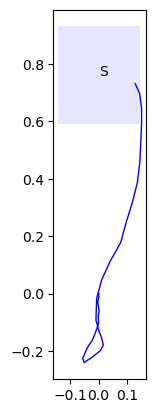

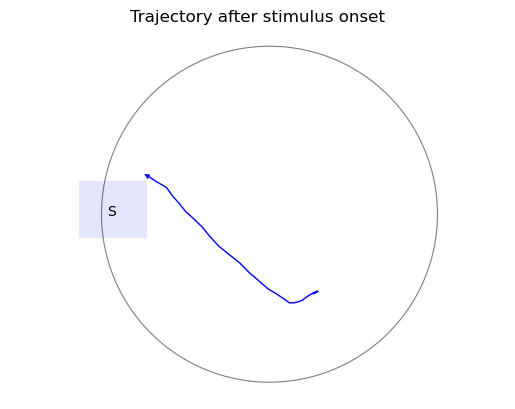

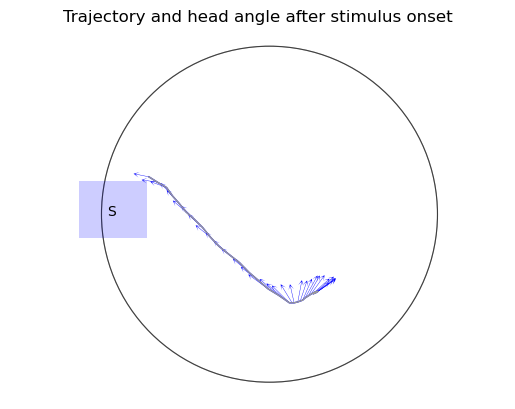

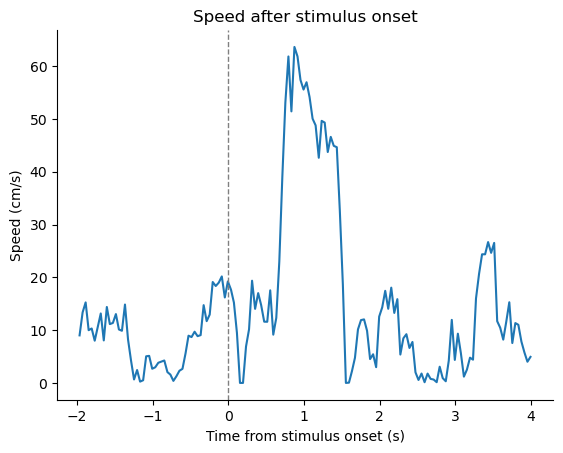

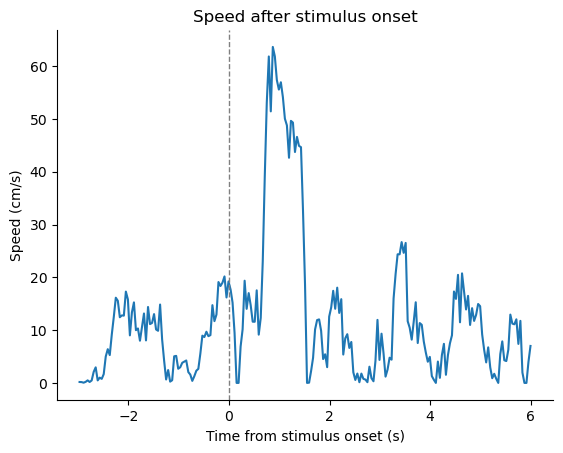

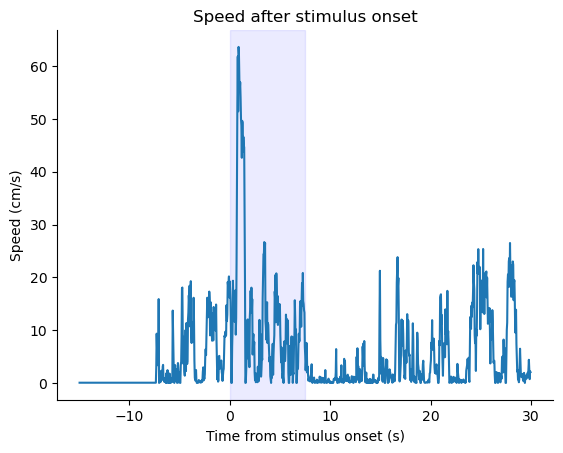

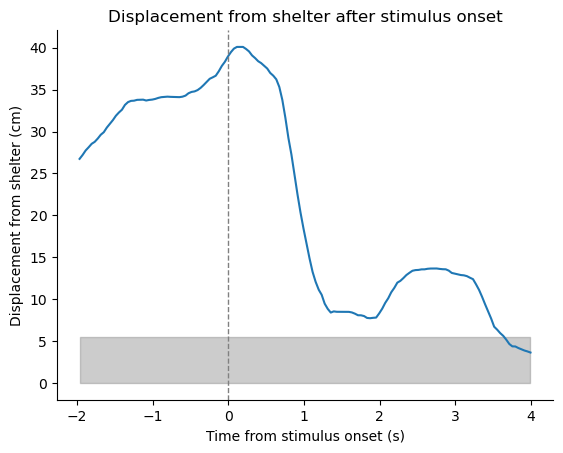

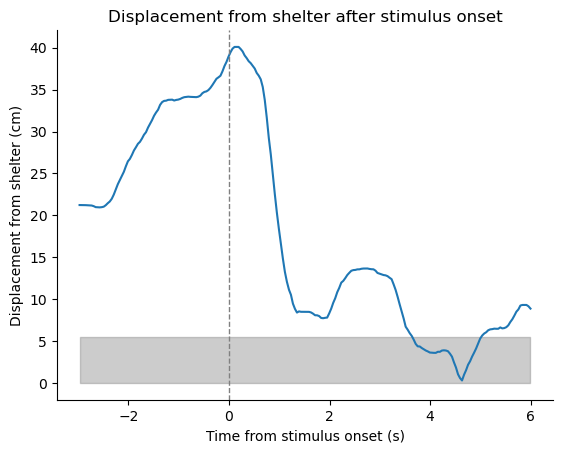

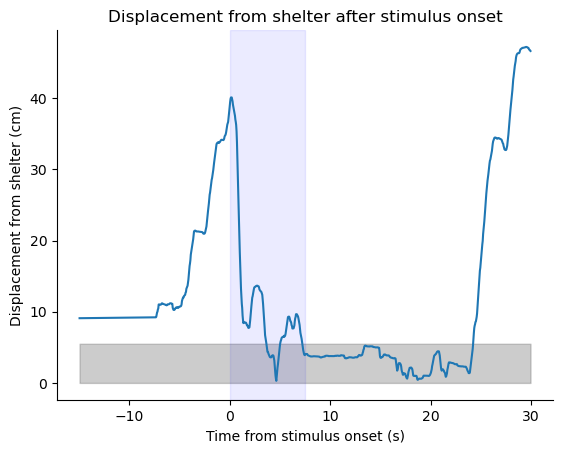

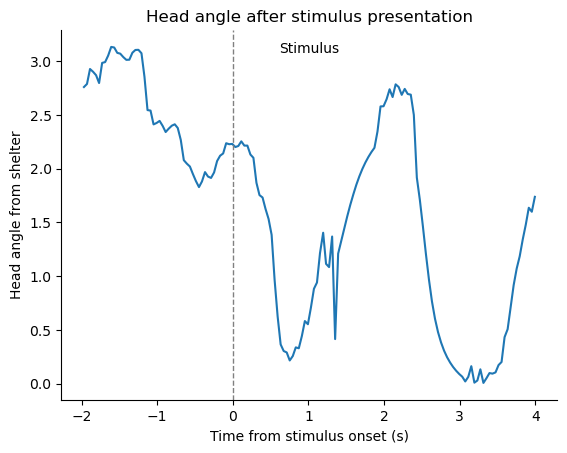

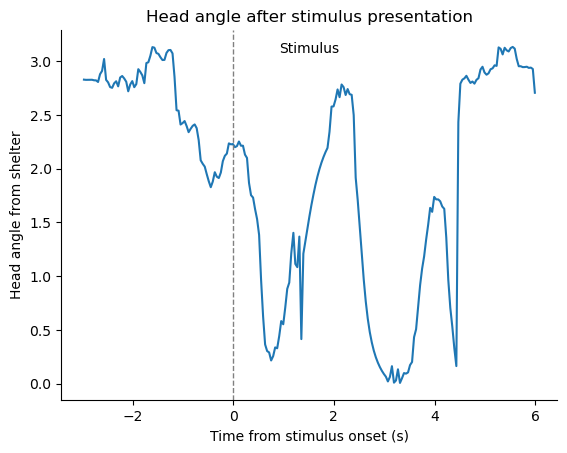

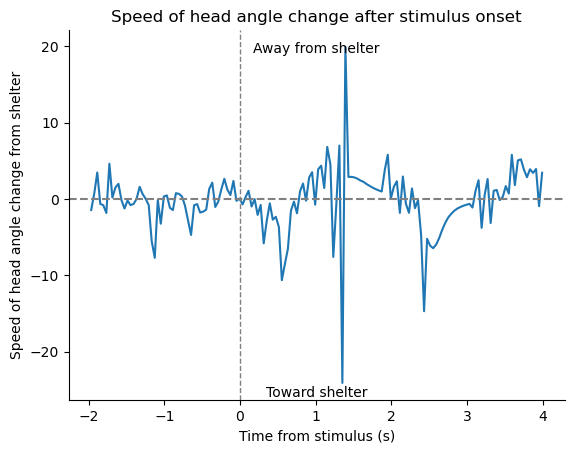

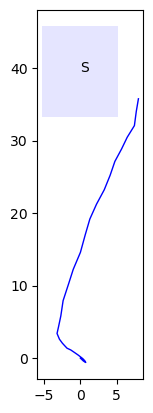

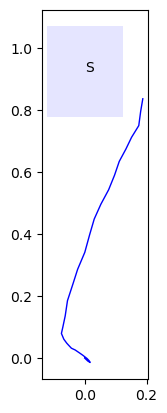

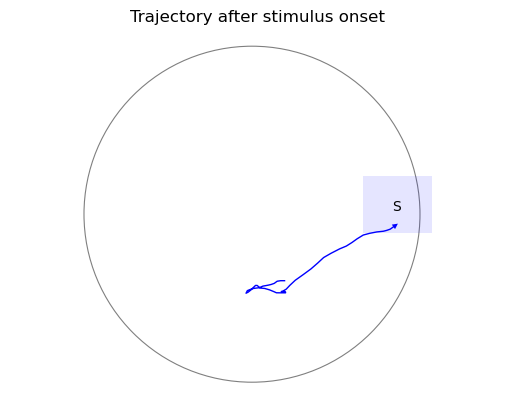

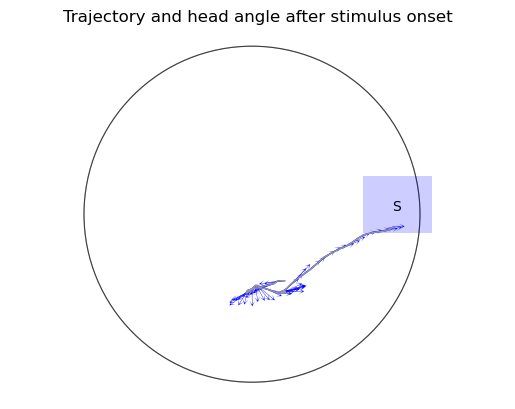

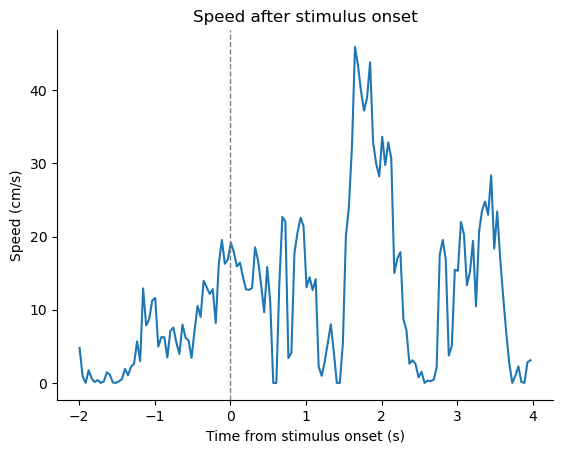

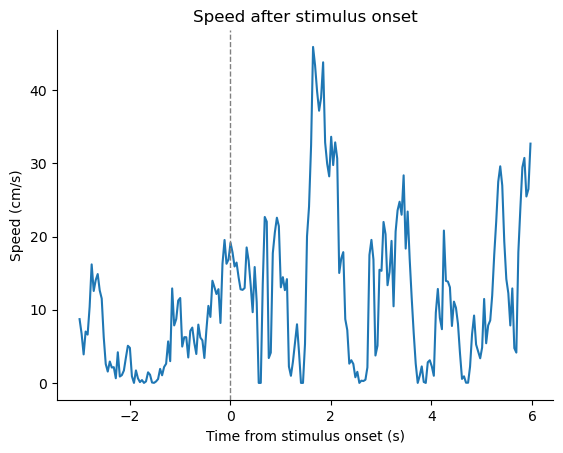

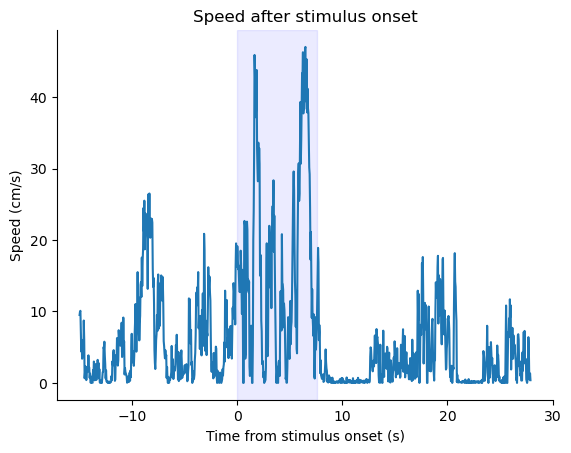

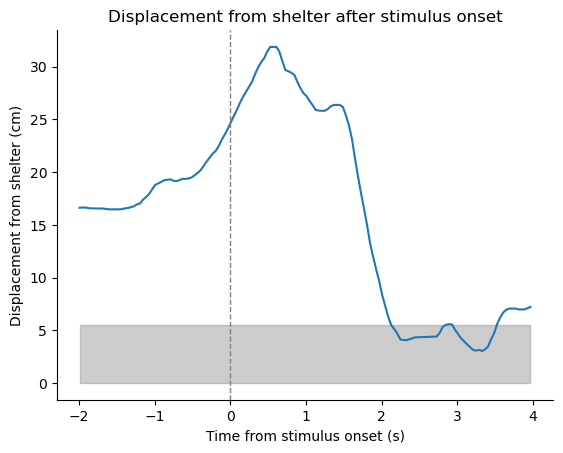

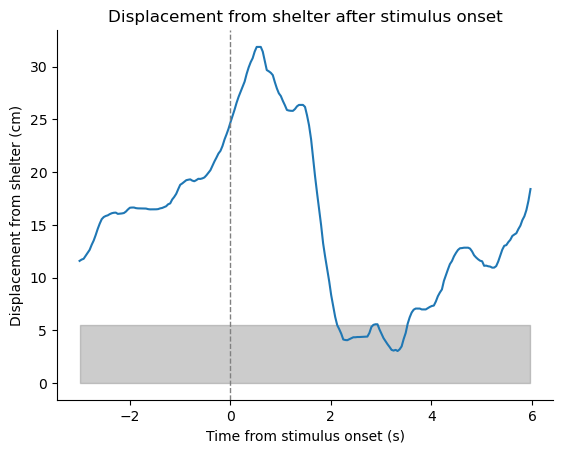

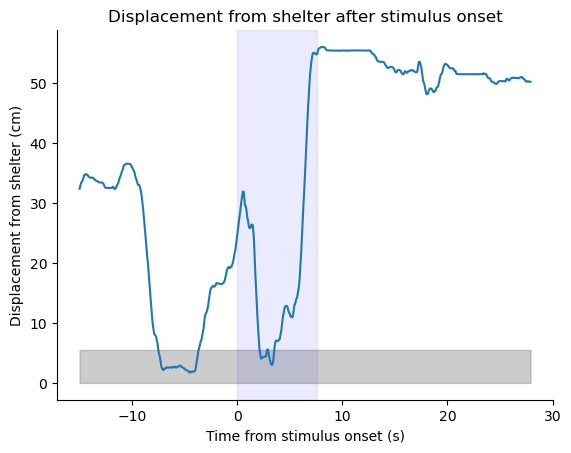

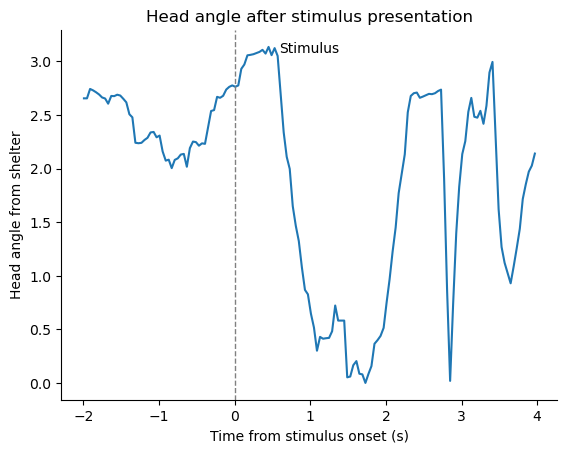

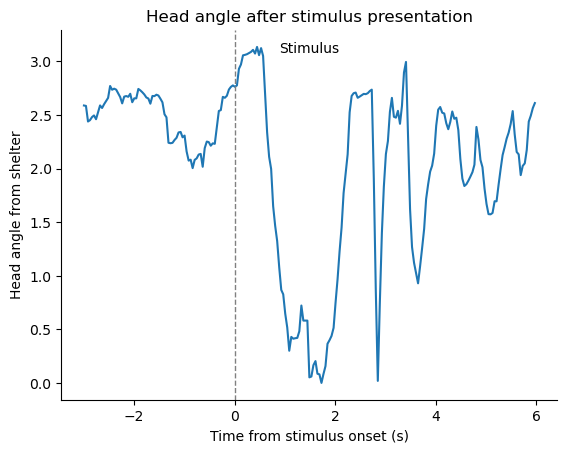

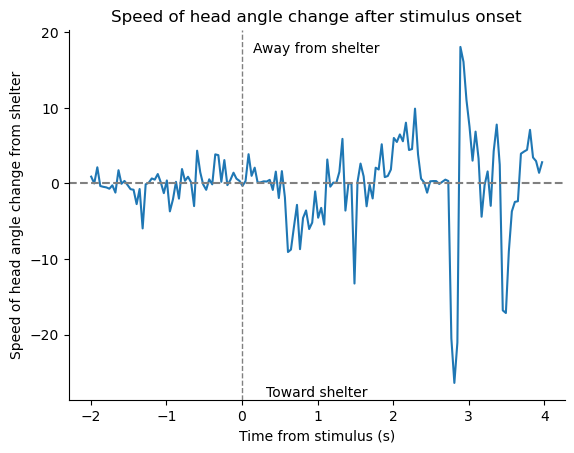

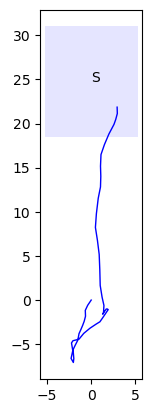

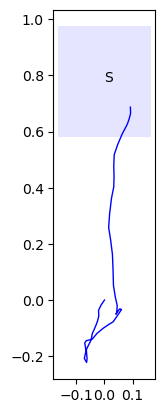

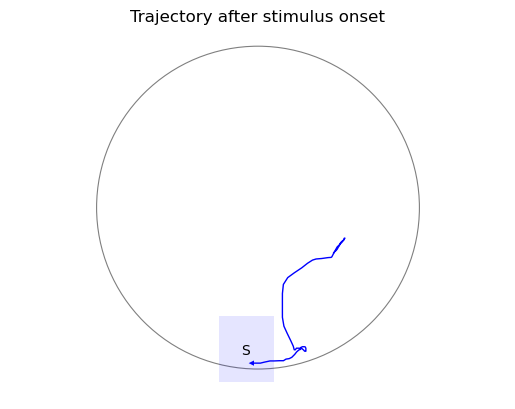

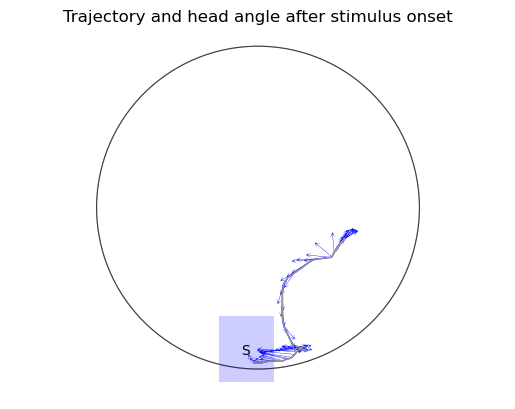

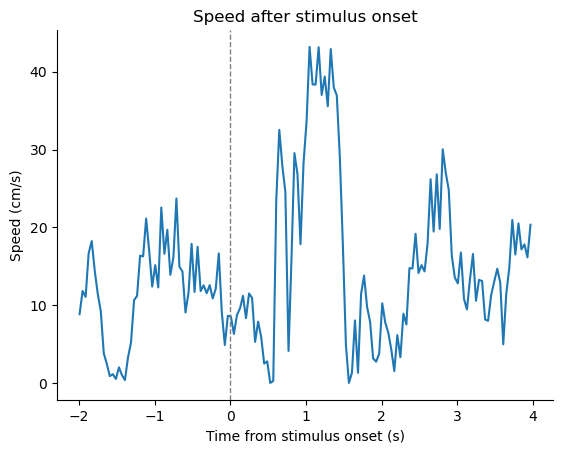

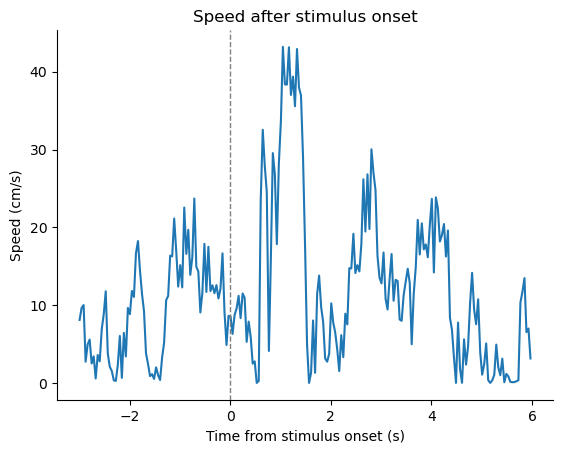

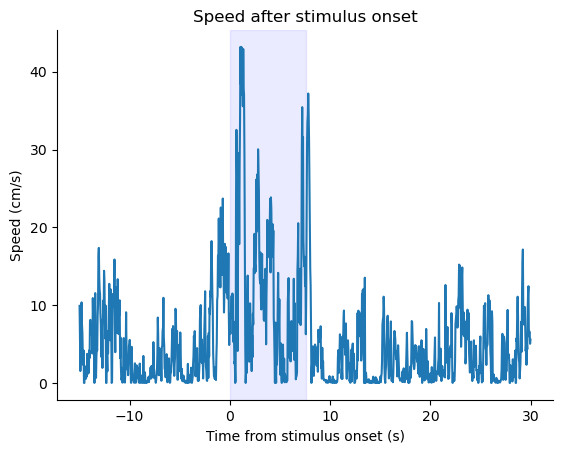

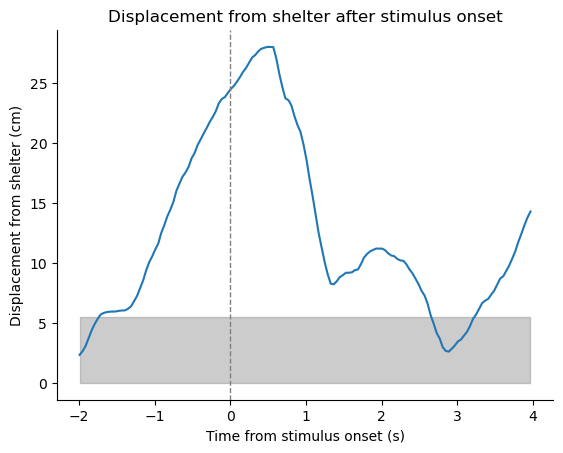

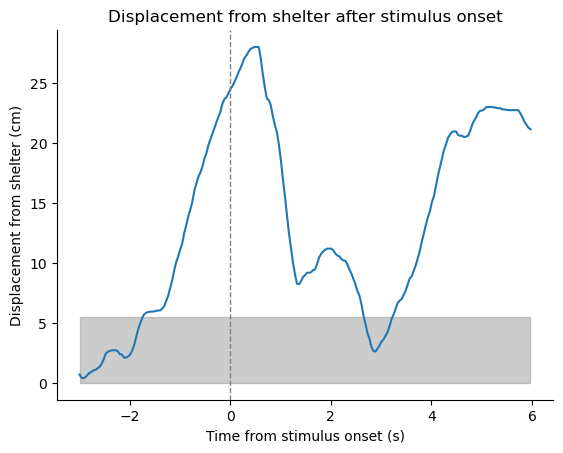

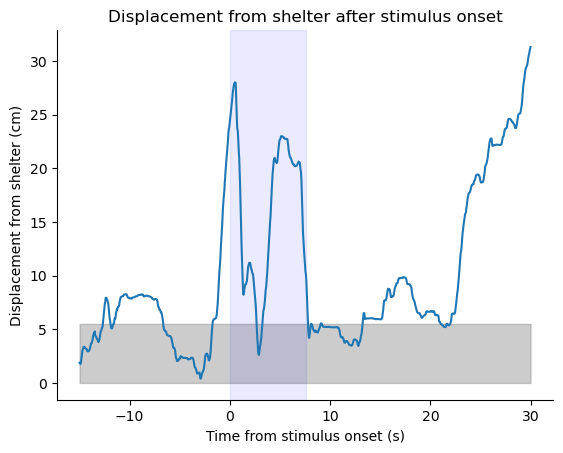

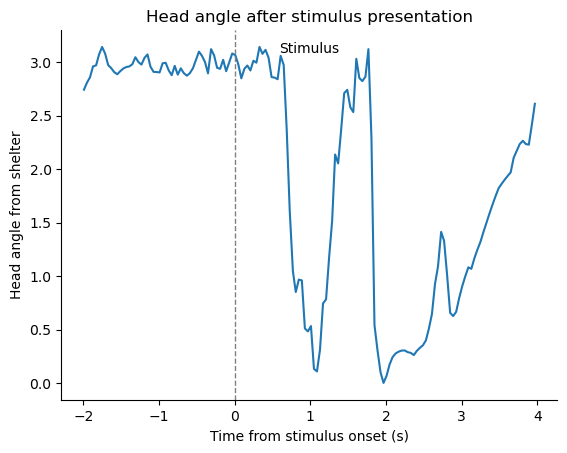

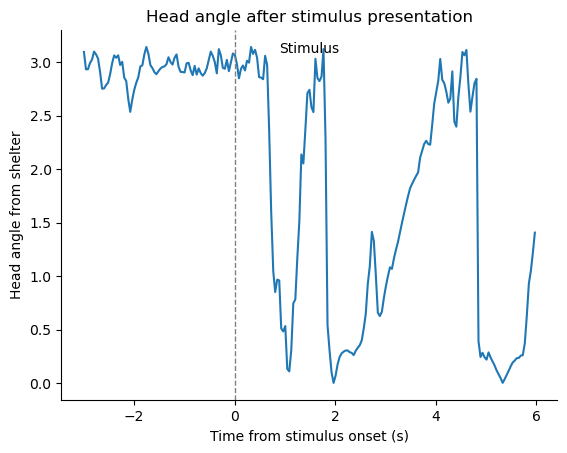

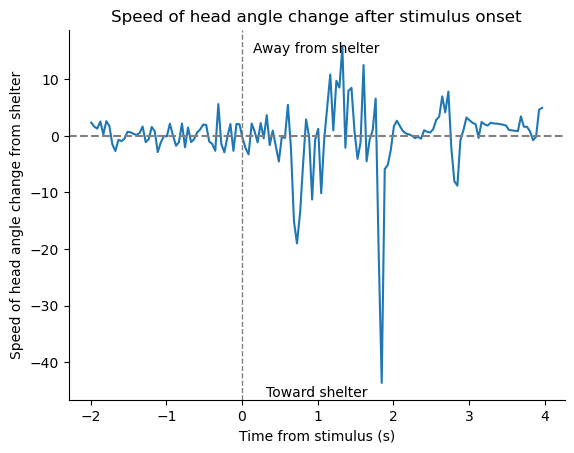

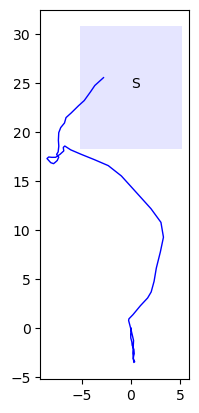

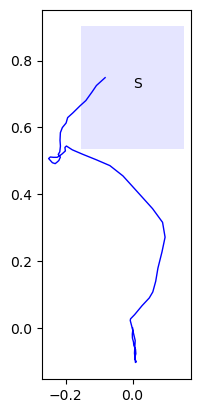

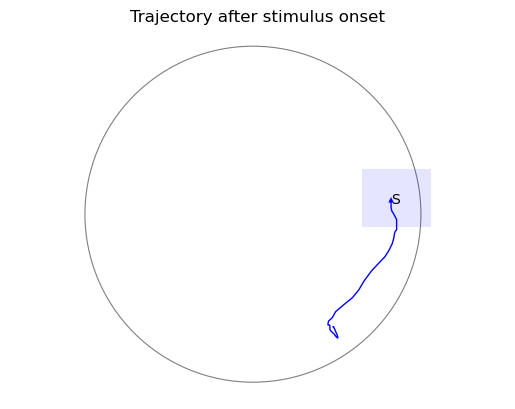

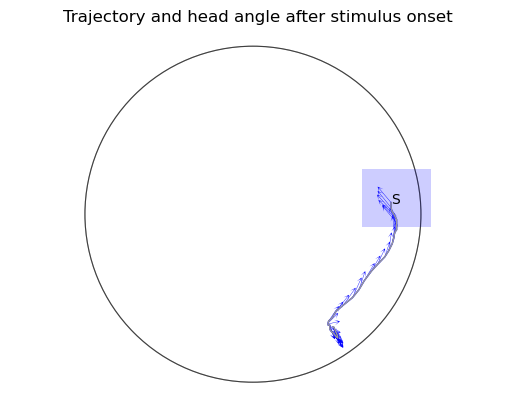

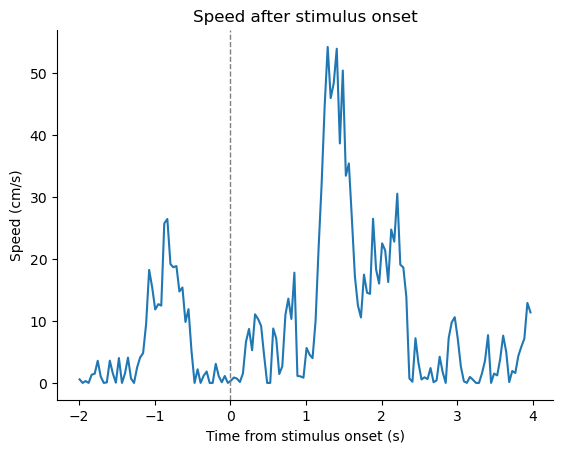

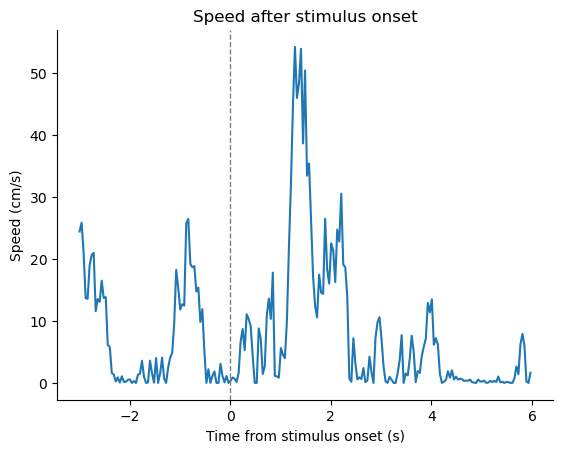

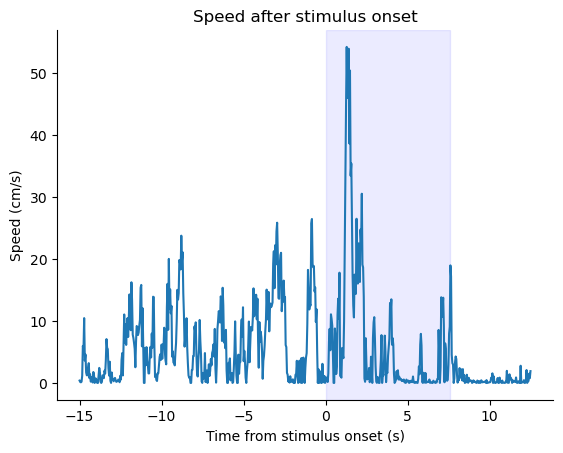

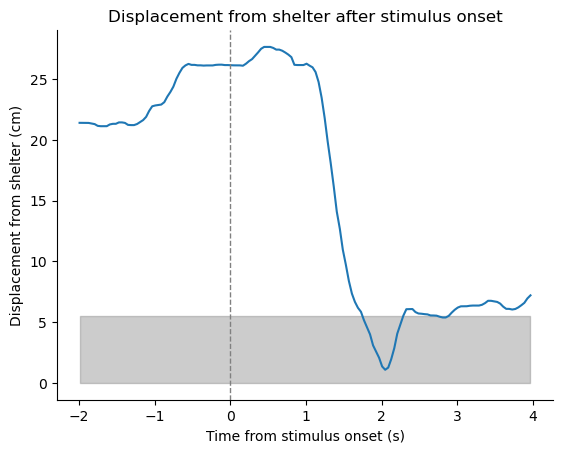

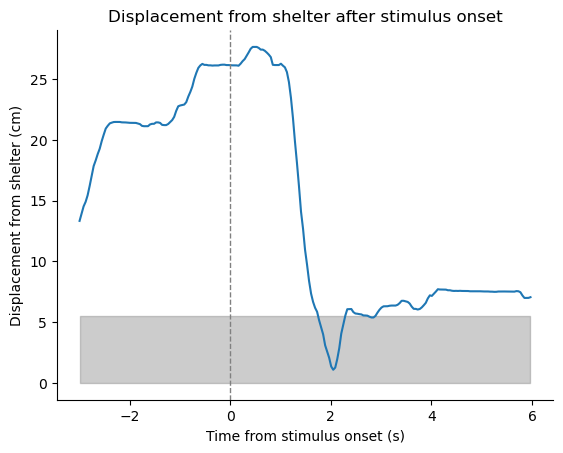

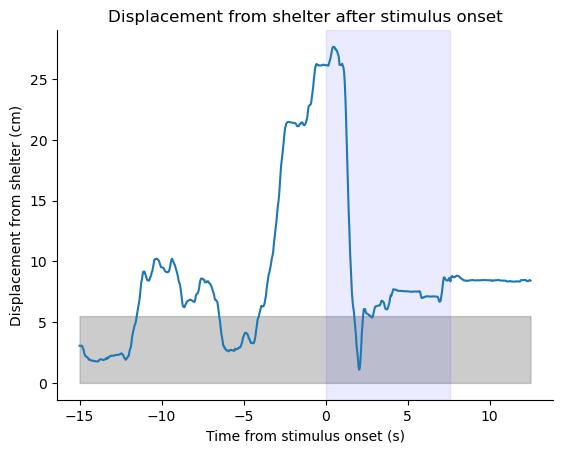

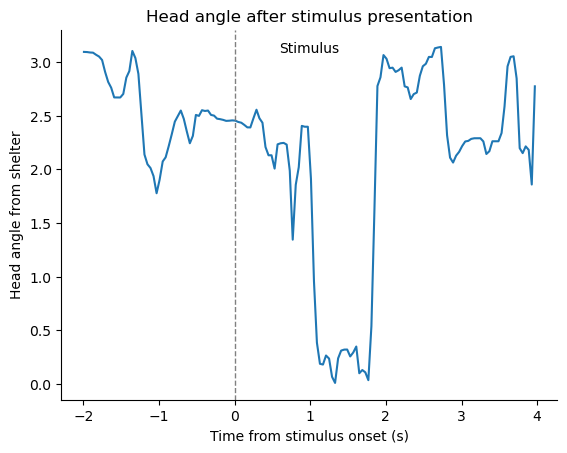

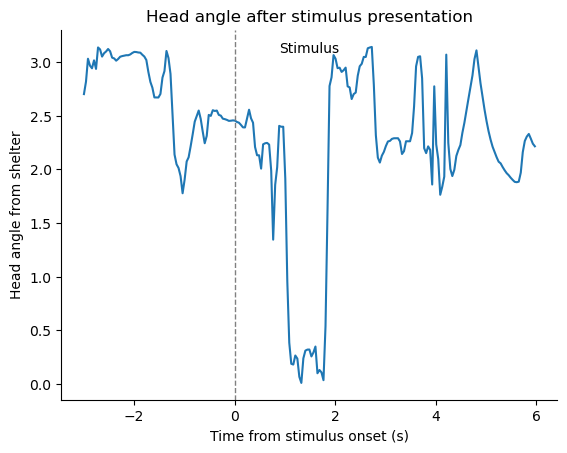

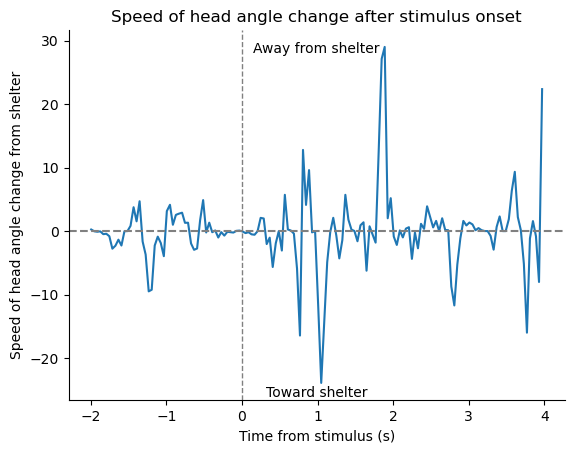

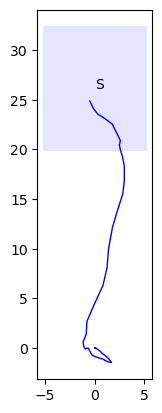

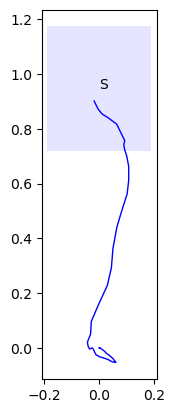

In [2]:
#read in info for each mouse
%run graphing_function_recent.ipynb

%run V2_M1.ipynb
M1_coord_scaled = coord_scaled
M1_escape_only = escape_only
M1_four_second = four_second
M1_six_second = six_second
M1_long_range = long_range
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y

%run V2_M2.ipynb
M2_coord_scaled = coord_scaled
M2_escape_only = escape_only
M2_four_second = four_second
M2_six_second = six_second
M2_long_range = long_range
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y

%run V2_M3.ipynb
M3_coord_scaled = coord_scaled
M3_escape_only = escape_only
M3_four_second = four_second
M3_six_second = six_second
M3_long_range = long_range
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y

%run V2_M4.ipynb
M4_coord_scaled = coord_scaled
M4_escape_only = escape_only
M4_four_second = four_second
M4_six_second = six_second
M4_long_range = long_range
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y

%run V2_M5.ipynb
M5_coord_scaled = coord_scaled
M5_escape_only = escape_only
M5_four_second = four_second
M5_six_second = six_second
M5_long_range = long_range
M5_initial_displacement = initial_displacement
M5_total_distance = total_distance
M5_shelter_x = shelter_x
M5_shelter_y = shelter_y

In [3]:
#number of dataframes for parameter:
#return list M1, M2, etc.

#string determines what column you look at 
def mouse_columns(n, string):
    mice = [f'M{i}_' + string for i in range(1, n+1)]
    return mice

In [4]:
#create a new dataframe with interpolated displacement, speed, or head angle (choose string)
def interpolate_data(start, stop, step, string, df):
    interpolate = pd.DataFrame()
    
    time = np.arange(start,stop,step)
    interpolate['time'] = time
    
    #interpolate displacement data
    data_raw = df[string]
    time_raw = df['time_set']
    
    displacement_inter = np.interp(time, time_raw, data_raw)
    
    return displacement_inter

In [5]:
#returns a dataframe with interpolated values 
#column_string determines which paramater you look at
#df_string determines which dataframe you look at 

def interpolate_all(n, start, stop, step, column_string, df_string):
    compiled_name = column_string + '_interpolated'
    compiled_name = pd.DataFrame()
    
    for i in range(1, n+1):
        name = f'M{i}_' + df_string #ex: look at just four_second
        df = globals()[name]
        
        interpolated_data = interpolate_data(start, stop, step, column_string, df)
        compiled_name[name + '_interpolated'] = interpolated_data
    
    time = np.arange(start,stop,step)  
    compiled_name['time'] = time
    
    return compiled_name

In [6]:
#return normalized df
def normalize(df):
    min_value = df.min()
    max_value = df.max()
    range_value = max_value - min_value
    normalized = (df - min_value) / range_value
    return normalized

In [7]:
#find mean and upper and lower limit for SEM
def summarize_data(n, string, df):
    mice = mouse_columns(n, string)
    
    for i in range(len(mice)):
        column_name = mice[i]
        df[column_name] = normalize(df[column_name])
        
    df['average'] = df[mice].mean(axis = 1)
    SEM = df[mice].sem(axis = 1)
    df['SEM_up'] = df['average'] + SEM
    df['SEM_down'] = df['average'] - SEM

In [8]:
#plot average + SEM
def plot_compiled_displacement(df, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Displacement (cm)') #convert to cm - cm/s
    ax.set_title('Average displacement from shelter after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
    
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [9]:
def plot_all_displacement(df, mice, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    
    for i in range(len(mice)):
        column_name = mice[i]
        yi = df[column_name]
        plt.plot(x,yi)

    ax.set_xlabel('Time from stimulus (s)')
    ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
    ax.set_title('Displacement from shelter during stimulus presentation')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)

    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [10]:
#plot compiled average and SEM for head angle
def plot_compiled_angle(df, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Head angle (°)') #convert to cm - cm/s
    ax.set_title('Head angle from shelter after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [11]:
#plot all for angle
def plot_all_angle(df, mice, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    
    for i in range(len(mice)):
        column_name = mice[i]
        yi = df[column_name]
        plt.plot(x,yi)

    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Head angle (°)') #convert to cm - cm/s
    ax.set_title('Head angle from shelter after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)

        
    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [12]:
#plot average + SEM for speed
def plot_compiled_speed(df, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Speed (cm/s)') #convert to cm - cm/s
    ax.set_title('Average speed after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [13]:
#plot all speed
def plot_all_speed(df, mice, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    
    for i in range(len(mice)):
        column_name = mice[i]
        yi = df[column_name]
        plt.plot(x,yi)

    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Speed (cm/s)') #convert to cm - cm/s
    ax.set_title('Speed after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)

        
    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [14]:
def plot_compiled_trajectory(n):
    fig, ax = plt.subplots()
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen']

    for i in range (1, n+1):
        mice = mouse_columns(n, 'normalized_df')
        df = globals()[mice[i-1]]
        ax.plot(df['x'],df['y'], color = colors[i-1], linewidth = 1)
        
    #add an arrow to show mouse's direction
        xf = df['x'].iloc[-1] #final x coordinate
        xo = df['x'].iloc[-2] #second to last x coordinate

        yf = df['y'].iloc[-1] #final y coordinate
        yo = df['y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc =colors[i-1], ec = "none")
        ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)
    
        
    #ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc = 'blue', ec = "none")

    ax.set_aspect('equal')
    ax.text(0,1, 'S', color = 'black', size = 10)
    ax.set_ylim(df['y'].min()-.25, df['y'].max() + .25)  # Extend y-axis by 1 unit on each side


    ax.axis('off')
    return plt

In [15]:
#the goal of this is to plot all of the trajectories together on one graph, not normalized.

def displacement_Compiled(M1_stop, M2_stop, M3_stop, M4_stop, M5_stop, length, M1_df, M2_df, M3_df, M4_df, M5_df):
    plt.figure()
    ax = plt.axes()

    # Define y-axis boundaries for shading
    y_min_shade = 0
    y_max_shade = 5.5

    # Fill the entire background from y_min_shade to y_max_shade
    plt.fill_between(x, y_min_shade, y_max_shade, color='gray', alpha=0.4)
    
    
    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
        
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()
    M1_x = M1_df['time_set']
    M1_y = M1_df['displacement']
    M2_x = M2_df['time_set']
    M2_y = M2_df['displacement']
    M3_x = M3_df['time_set']
    M3_y = M3_df['displacement']
    M4_x = M4_df['time_set']
    M4_y = M4_df['displacement']
    M5_x = M5_df['time_set']
    M5_y = M5_df['displacement']

    ax.plot(M1_x,M1_y)
    ax.plot(M2_x,M2_y)
    ax.plot(M3_x,M3_y)
    ax.plot(M4_x,M4_y)
    ax.plot(M5_x,M5_y)
    
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
    ax.set_title('Displacement from shelter after stimulus onset')
 
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    #plt.fill_between(x, y, where=(y <= 5), color='gray', alpha=0.5)
    
    return plt    

In [16]:
#plot all trajectories on one!
#plot trajectory using center point
#use escape dataframe to just see escape path
def combined_trajectory(M1_shelter_x, M1_shelter_y, M1_x_diam, M1_y_diam, M1_df, M2_shelter_x, M2_shelter_y, M2_x_diam, M2_y_diam, M2_df, M3_shelter_x, M3_shelter_y, M3_x_diam, M3_y_diam, M3_df, M4_shelter_x, M4_shelter_y, M4_x_diam, M4_y_diam, M4_df, M5_shelter_x, M5_shelter_y, M5_x_diam, M5_y_diam, M5_df):
    
    fig = plt.figure()  #create figure to fill in
    ax = plt.axes()
    #make x and y scales equal - present as a circle
    plt.axis('equal')
    
    #All of M1
    M1_x = M1_df['center_x']
    M1_y = M1_df['center_y']
    M1_platform = Ellipse(xy = (0, 0), width = M1_x_diam, height = M1_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    M1_shelter = patches.Rectangle(((M1_shelter_x - 6.25), (M1_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.plot(M1_x,M1_y, color = 'red', linewidth = 1)
    plt.text(M1_shelter_x-1,M1_shelter_y-1, 'S', color = 'black', size = 10)
    ax.add_patch(M1_platform)
    ax.add_patch(M1_shelter)
    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
    xf = M1_df['center_x'].iloc[-1] #final x coordinate
    xo = M1_df['center_x'].iloc[-2] #second to last x coordinate
    yf = M1_df['center_y'].iloc[-1] #final y coordinate
    yo = M1_df['center_y'].iloc[-2] #second to last y coordinate
    #plot arrow: base x, base y, displacement x, displacement y
    plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'red', ec = "none")
    ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
    ax.set_xlabel('x-position (cm)', fontsize=12)
    ax.set_ylabel('y-position (cm)', fontsize=12)
    
    #All of M2
    M2_x = M2_df['center_x']
    M2_y = M2_df['center_y']
    M2_platform = Ellipse(xy = (0, 0), width = M2_x_diam, height = M2_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    M2_shelter = patches.Rectangle(((M2_shelter_x - 6.25), (M2_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.plot(M2_x,M2_y, color = 'orange', linewidth = 1)
    plt.text(M2_shelter_x-1,M2_shelter_y-1, 'S', color = 'black', size = 10)
    ax.add_patch(M2_platform)
    ax.add_patch(M2_shelter)
    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
    xf = M2_df['center_x'].iloc[-1] #final x coordinate
    xo = M2_df['center_x'].iloc[-2] #second to last x coordinate
    yf = M2_df['center_y'].iloc[-1] #final y coordinate
    yo = M2_df['center_y'].iloc[-2] #second to last y coordinate
    #plot arrow: base x, base y, displacement x, displacement y
    plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'orange', ec = "none")
    ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
    ax.set_xlabel('x-position (cm)', fontsize=12)
    ax.set_ylabel('y-position (cm)', fontsize=12)
    
    #All of M3
    M3_x = M3_df['center_x']
    M3_y = M3_df['center_y']
    M3_platform = Ellipse(xy = (0, 0), width = M3_x_diam, height = M3_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    M3_shelter = patches.Rectangle(((M3_shelter_x - 6.25), (M3_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.plot(M3_x,M3_y, color = 'yellow', linewidth = 1)
    plt.text(M3_shelter_x-1,M2_shelter_y-1, 'S', color = 'black', size = 10)
    ax.add_patch(M3_platform)
    ax.add_patch(M3_shelter)
    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
    xf = M3_df['center_x'].iloc[-1] #final x coordinate
    xo = M3_df['center_x'].iloc[-2] #second to last x coordinate
    yf = M3_df['center_y'].iloc[-1] #final y coordinate
    yo = M3_df['center_y'].iloc[-2] #second to last y coordinate
    #plot arrow: base x, base y, displacement x, displacement y
    plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'yellow', ec = "none")
    ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
    ax.set_xlabel('x-position (cm)', fontsize=12)
    ax.set_ylabel('y-position (cm)', fontsize=12)
    
    #All of M4
    M4_x = M4_df['center_x']
    M4_y = M4_df['center_y']
    M4_platform = Ellipse(xy = (0, 0), width = M4_x_diam, height = M4_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    M4_shelter = patches.Rectangle(((M4_shelter_x - 5.25), (M4_shelter_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.plot(M4_x,M4_y, color = 'green', linewidth = 1)
    plt.text(M4_shelter_x-1,M4_shelter_y-1, 'S', color = 'black', size = 10)
    ax.add_patch(M4_platform)
    ax.add_patch(M4_shelter)
    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
    xf = M4_df['center_x'].iloc[-1] #final x coordinate
    xo = M4_df['center_x'].iloc[-2] #second to last x coordinate
    yf = M4_df['center_y'].iloc[-1] #final y coordinate
    yo = M4_df['center_y'].iloc[-2] #second to last y coordinate
    #plot arrow: base x, base y, displacement x, displacement y
    plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'green', ec = "none")
    ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
    ax.set_xlabel('x-position (cm)', fontsize=12)
    ax.set_ylabel('y-position (cm)', fontsize=12)
    
    #All of M5
    M5_x = M5_df['center_x']
    M5_y = M5_df['center_y']
    M5_platform = Ellipse(xy = (0, 0), width = M5_x_diam, height = M5_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    M5_shelter = patches.Rectangle(((M5_shelter_x - 6.25), (M5_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.plot(M5_x,M5_y, color = 'blue', linewidth = 1)
    plt.text(M5_shelter_x-1,M5_shelter_y-1, 'S', color = 'black', size = 10)
    ax.add_patch(M5_platform)
    ax.add_patch(M5_shelter)
    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
    xf = M5_df['center_x'].iloc[-1] #final x coordinate
    xo = M5_df['center_x'].iloc[-2] #second to last x coordinate
    yf = M5_df['center_y'].iloc[-1] #final y coordinate
    yo = M5_df['center_y'].iloc[-2] #second to last y coordinate
    #plot arrow: base x, base y, displacement x, displacement y
    plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'blue', ec = "none")
    ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
    ax.set_xlabel('x-position (cm)', fontsize=12)
    ax.set_ylabel('y-position (cm)', fontsize=12)
    
    return plt
    
    #plot the center x and y coordinates
    #M1_x = M1_df['time_set']
    #M1_y = M1_df['displacement']
    #M2_x = M2_df['time_set']
    #M2_y = M2_df['displacement']
    #M3_x = M3_df['time_set']
   # M3_y = M3_df['displacement']
  #  M4_x = M4_df['time_set']
    #M4_y = M4_df['displacement']
   # M5_x = M5_df['time_set']
   # M5_y = M5_df['displacement']
    
    #normalize time and set as t (for time colorscale): FIGURE OUT COLOR SCALE
    #t = normalize(df['time_set'])

    #plot the platform and shelter (keep the same for combining)
    #M4_platform = Ellipse(xy = (0, 0), width = M4_x_diam, height = M4_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    #M5_platform = Ellipse(xy = (0, 0), width = M5_x_diam, height = M5_y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)

    #determine orientation of platform based on platform location (also keep the same... at least for now)
    #if shelter_x<-15 or shelter_x>15:
        
    #M1_shelter = patches.Rectangle(((M1_shelter_x - 6.25), (M1_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    #M2_shelter = patches.Rectangle(((M2_shelter_x - 6.25), (M2_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    #M3_shelter = patches.Rectangle(((M3_shelter_x - 6.25), (M3_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    #M4_shelter = patches.Rectangle(((M4_shelter_x - 6.25), (M4_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    #M5_shelter = patches.Rectangle(((M5_shelter_x - 6.25), (M5_shelter_y-5.25)), 12.5,10.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)

        #else:
        #shelter = patches.Rectangle(((shelter_x - 5.25), (shelter_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
   
    #adds S to mark shelter location.
    #plt.text(M1_shelter_x-1,M1_shelter_y-1, 'S', color = 'black', size = 10)

    #plotting trajectory.
    #ax.plot(M1_x,M1_y, color = 'red', linewidth = 1)
    #ax.plot(M2_x,M2_y, color = 'orange', linewidth = 1)
    #ax.plot(M3_x,M3_y, color = 'yellow', linewidth = 1)
    #ax.plot(M4_x,M4_y, color = 'green', linewidth = 1)
    #ax.plot(M5_x,M5_y, color = 'b', linewidth = 1)
    #ax.add_patch(M1_platform)
    #ax.add_patch(M2_platform)
    #ax.add_patch(M3_platform)
    #ax.add_patch(M4_platform)
    #ax.add_patch(M5_platform)

    #ax.add_patch(M1_shelter)
    #ax.add_patch(M2_shelter)
    #ax.add_patch(M3_shelter)
   # ax.add_patch(M4_shelter)
   # ax.add_patch(M5_shelter)

    """
    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
    xf = df['center_x'].iloc[-1] #final x coordinate
    xo = df['center_x'].iloc[-2] #second to last x coordinate

    yf = df['center_y'].iloc[-1] #final y coordinate
    yo = df['center_y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
    plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'blue', ec = "none")
    ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
    ax.set_xlabel('x-position (cm)', fontsize=12)
    ax.set_ylabel('y-position (cm)', fontsize=12)

    #remove axes
    plt.axis('off')

        
    return plt
"""

In [17]:
#create head_angle vs. displacement graph.

